In [2]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [3]:
# Load the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

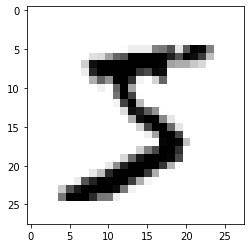

In [6]:
plt.imshow(X_train[0], cmap='gray_r')

In [5]:
from keras.utils import to_categorical

# Categorize output
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [26]:
print(y_train[0], '-->', y_cat_train[0])

5 --> [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [6]:
# Standardize input
X_train = X_train / 255
X_test = X_test / 255

In [8]:
# Transfer grayscale image to be compatible with RGB format
X_train_len = len(X_train)
X_train = X_train.reshape((X_train_len,28,28,1))

X_test_len = len(X_test)
X_test = X_test.reshape((X_test_len,28,28,1))

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [15]:
model = Sequential()

model.add(Flatten(input_shape=(28,28,1)))

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit(X_train, y_cat_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 16s 275us/step - loss: 0.2526 - acc: 0.9273
Epoch 2/10
60000/60000 [==============================] - 16s 270us/step - loss: 0.1181 - acc: 0.9653
Epoch 3/10
60000/60000 [==============================] - 17s 278us/step - loss: 0.0875 - acc: 0.9748
Epoch 4/10
60000/60000 [==============================] - 17s 280us/step - loss: 0.0705 - acc: 0.9793
Epoch 5/10
60000/60000 [==============================] - 17s 279us/step - loss: 0.0617 - acc: 0.9828
Epoch 6/10
60000/60000 [==============================] - 17s 278us/step - loss: 0.0521 - acc: 0.9859
Epoch 7/10
60000/60000 [==============================] - 17s 276us/step - loss: 0.0459 - acc: 0.9873
Epoch 8/10
60000/60000 [==============================] - 18s 306us/step - loss: 0.0400 - acc: 0.9887
Epoch 9/10
60000/60000 [==============================] - 17s 285us/step - loss: 0.0362 - acc: 0.9903
Epoch 10/10
60000/60000 [==============================] - 17s 288us/step - loss: 

In [20]:
model.evaluate(X_train, y_cat_train)

60000/60000 [==============================] - 6s 94us/step


[0.024205628940167936, 0.99385]

In [21]:
model.evaluate(X_test, y_cat_test)

10000/10000 [==============================] - 1s 94us/step


[0.10539720112981886, 0.9768]